In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset

heart_data = pd.read_csv("heart.csv")

In [7]:
# Explore some info on the dataset
# heart_data.shape
heart_data.info()
heart_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# A small visual of the data
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Check for missing values
heart_data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart_data.duplicated().sum()

np.int64(1)

<Figure size 1200x800 with 0 Axes>

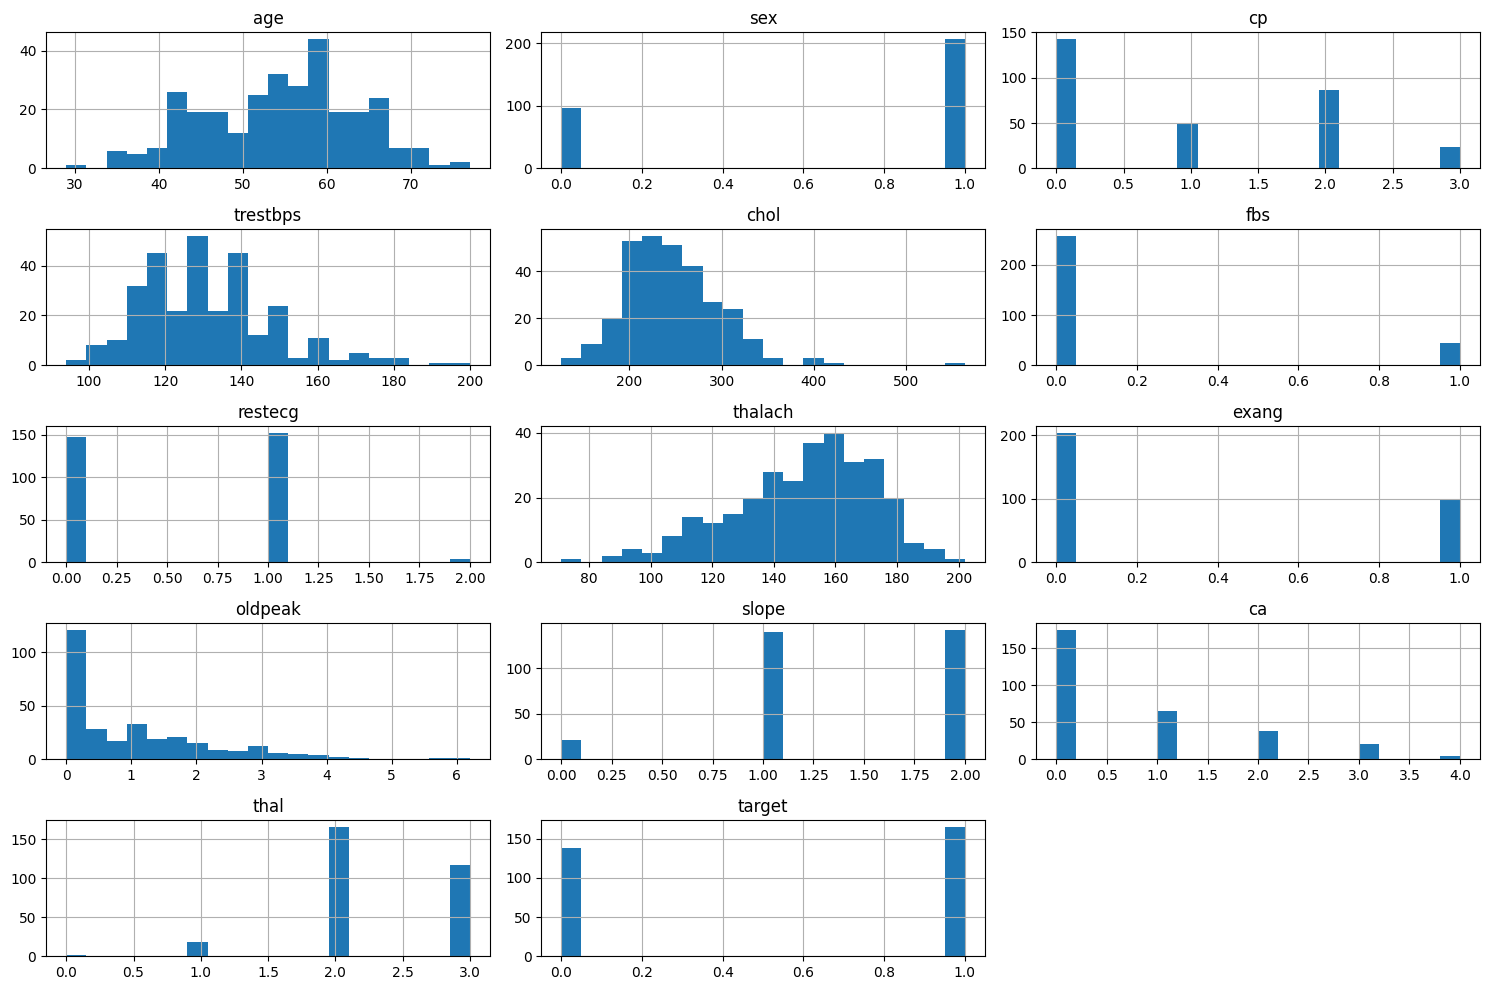

In [8]:
# Visualize the distribution of key features
plt.figure(figsize=(12, 8))
heart_data.hist(bins=20, figsize=(15, 10), layout=(5, 3))
plt.tight_layout()
plt.show()

Universal analysis numerical variables


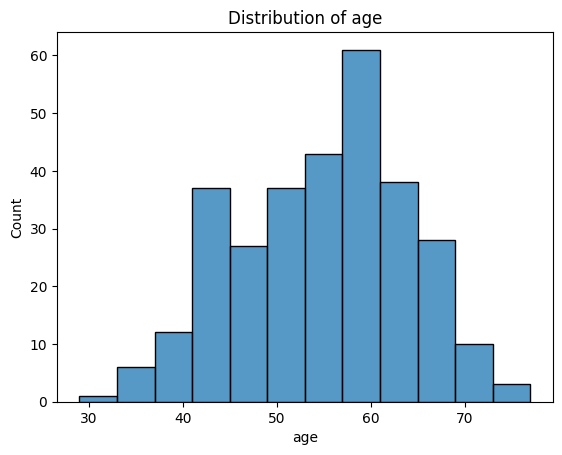

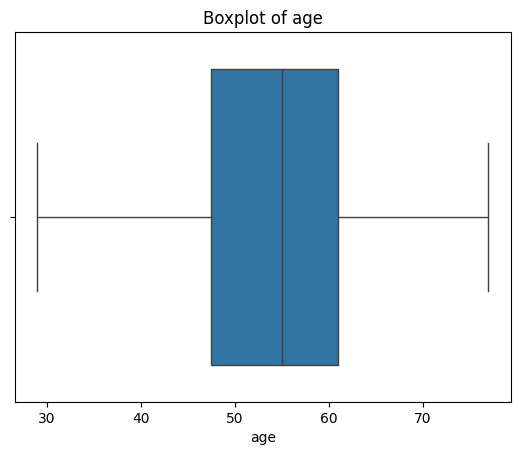

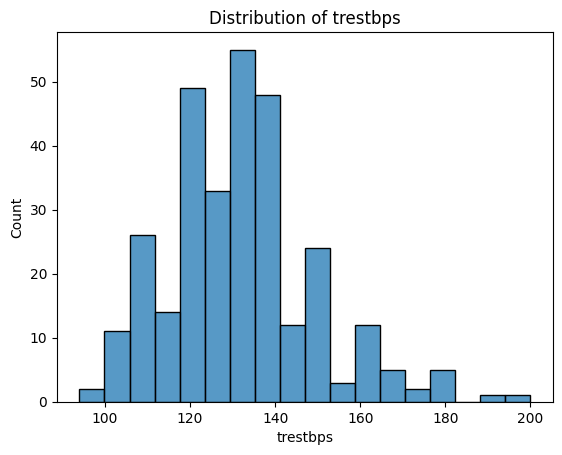

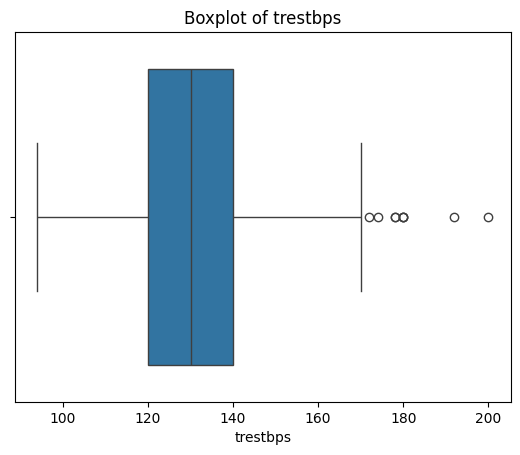

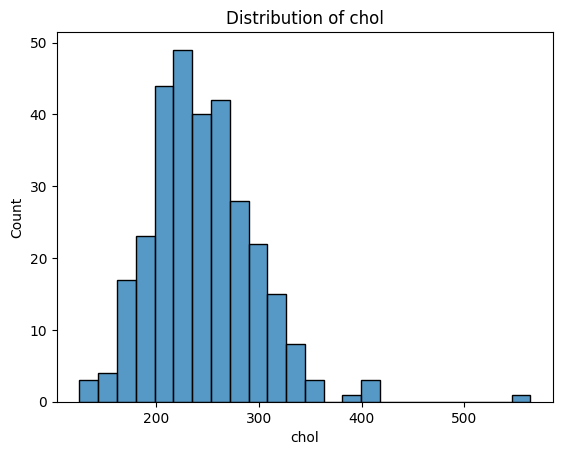

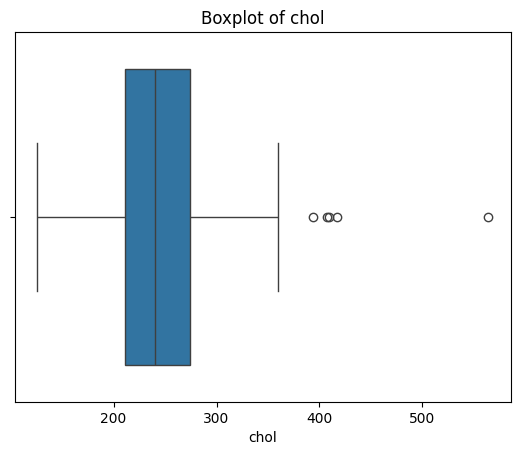

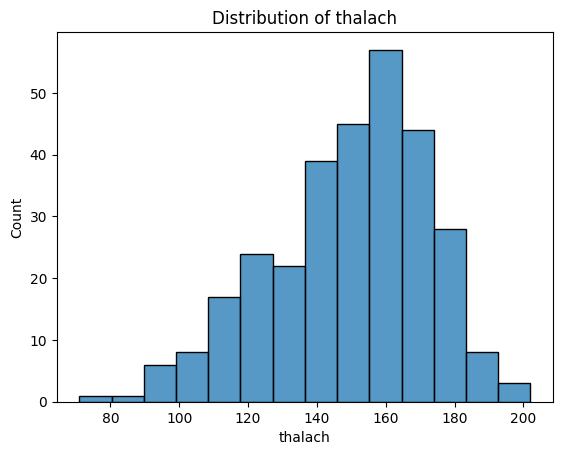

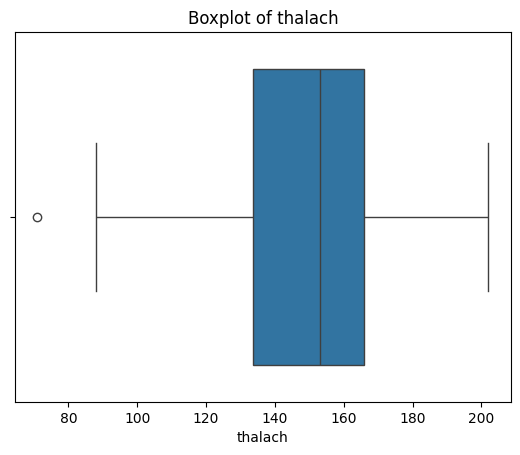

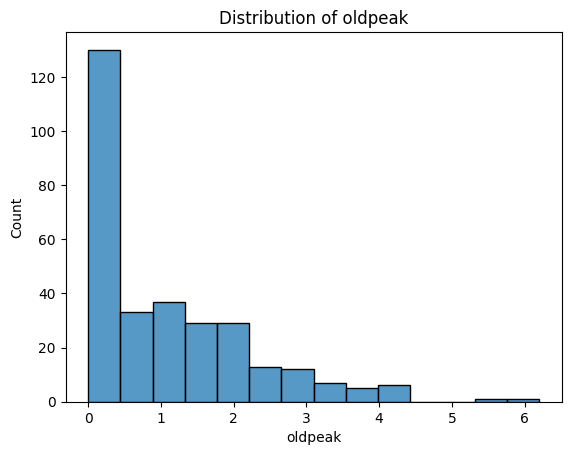

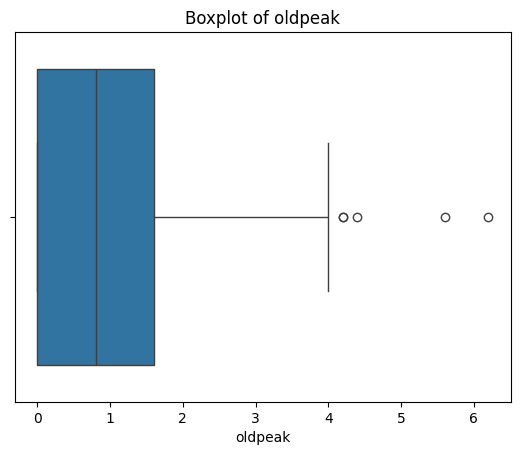

In [16]:

# Univariate Analysis - Numerical Variables
print("Universal analysis numerical variables")
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_columns:
    sns.histplot(heart_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    sns.boxplot(x=heart_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Bivariable analysis categorical variables vs target


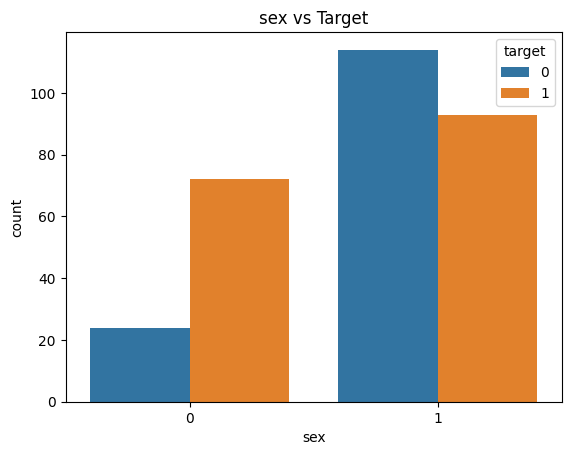

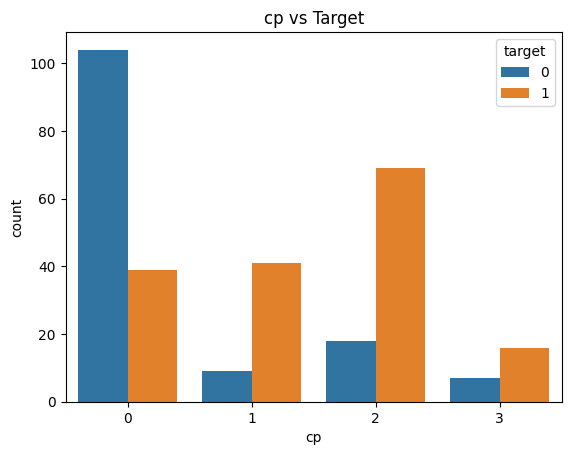

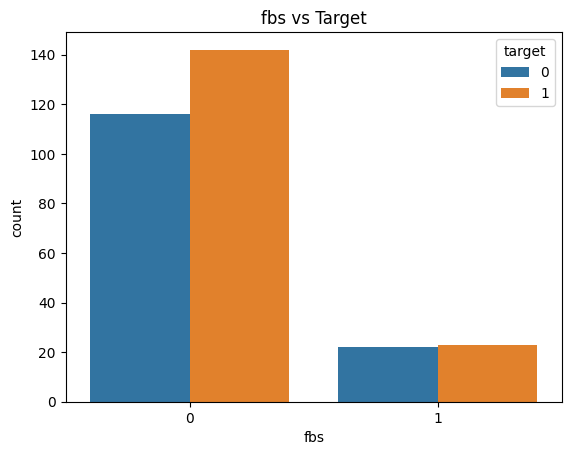

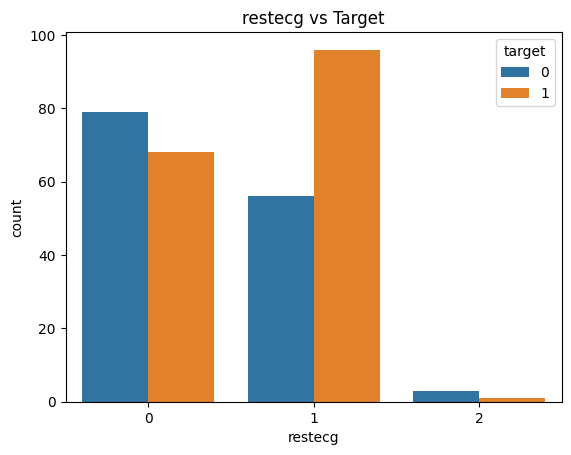

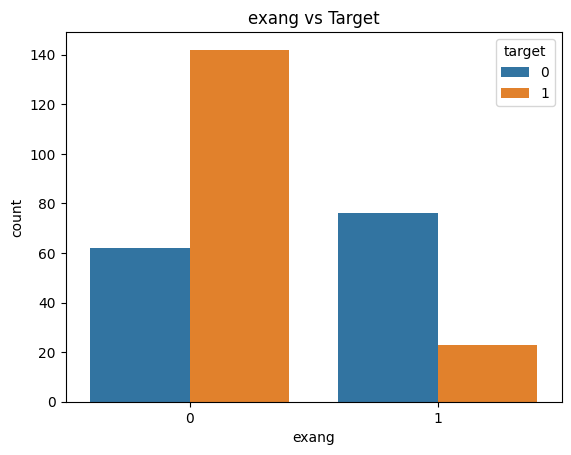

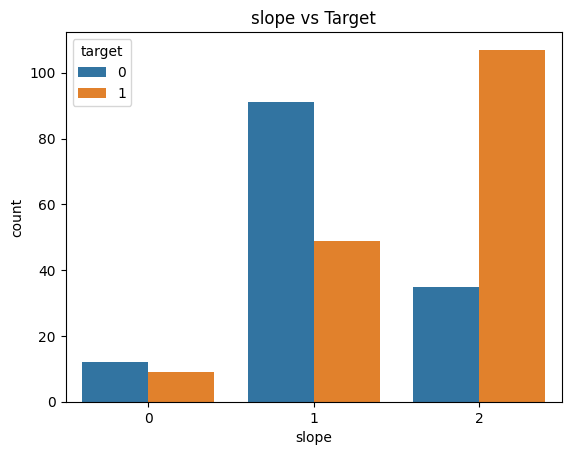

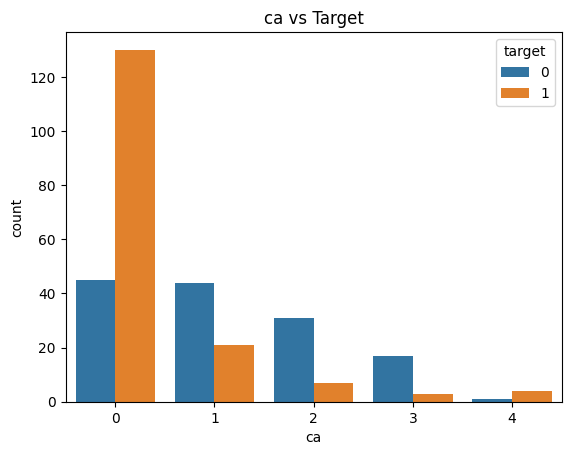

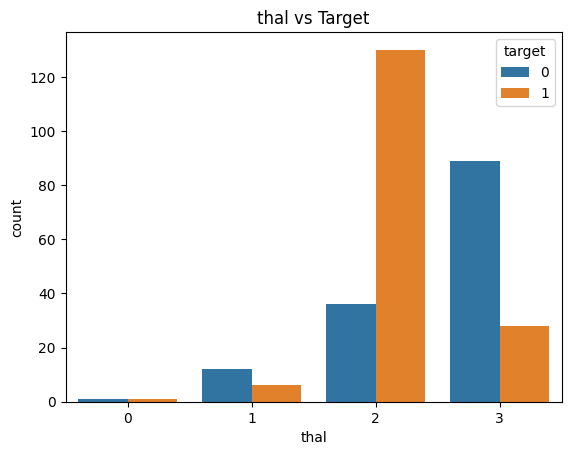

In [17]:
# Bivariate Analysis - Categorical vs Target
print("Bivariable analysis categorical variables vs target")
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_columns[:-1]:  # exclude target itself
    sns.countplot(x=col, hue='target', data=heart_data)
    plt.title(f'{col} vs Target')
    plt.show()

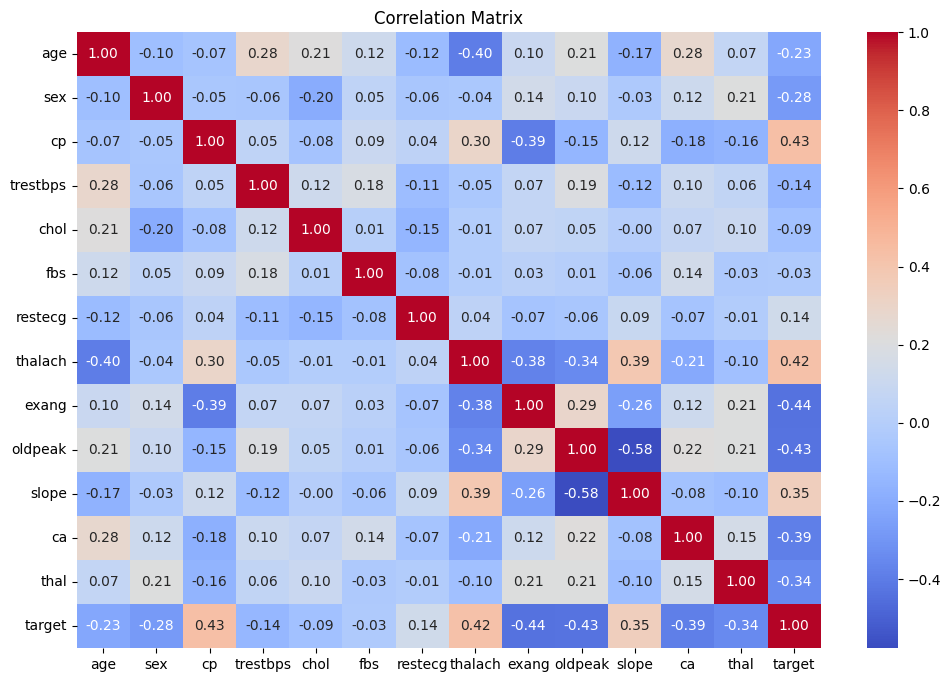

In [15]:
# Compute and visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

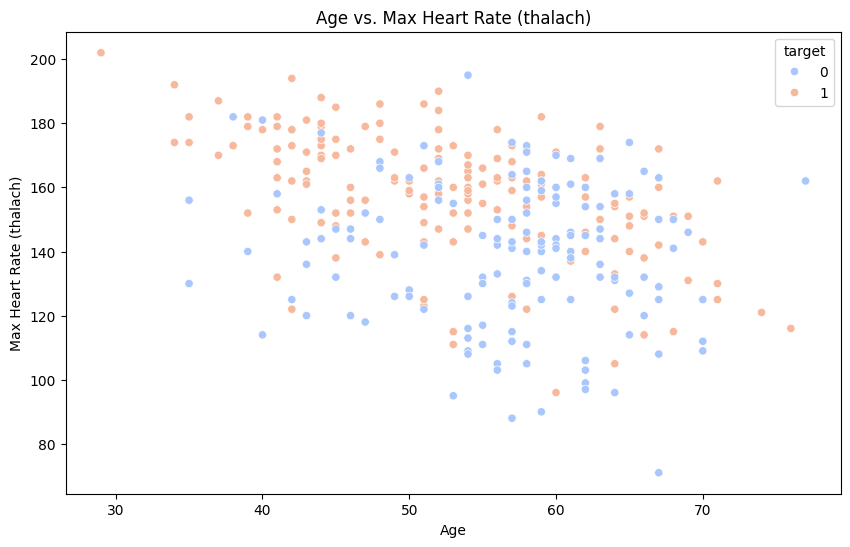

In [10]:
# Scatter plot: Age vs. Max Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', data=heart_data, hue='target', palette='coolwarm')
plt.title('Age vs. Max Heart Rate (thalach)')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.show()

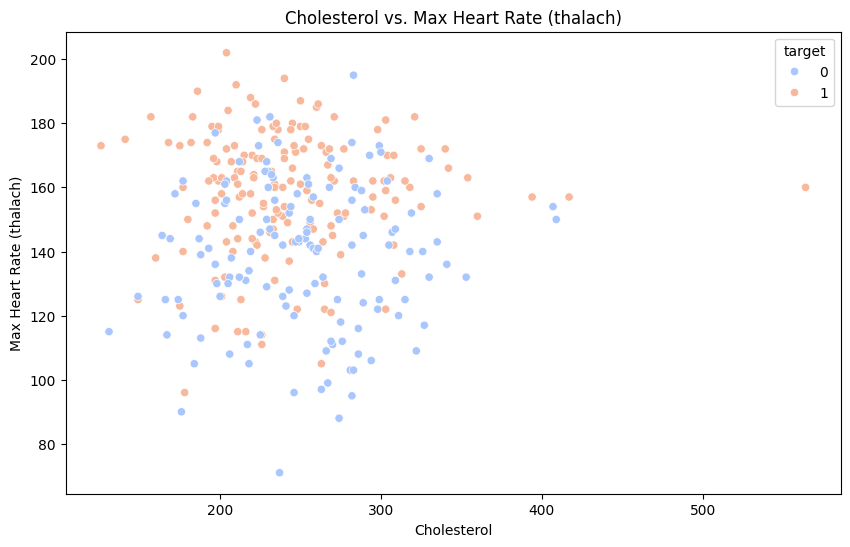

In [13]:

# Scatter plot: Cholesterol vs. Max Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='chol', y='thalach', data=heart_data, hue='target', palette='coolwarm')
plt.title('Cholesterol vs. Max Heart Rate (thalach)')
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate (thalach)')
plt.show()

In [19]:
# Groupby Statistics
print("Group by stats")
print(heart_data.groupby('target').mean())

# Detecting Outliers using IQR
print("Outlayers using IQR")
for col in numerical_columns:
    Q1 = heart_data[col].quantile(0.25)
    Q3 = heart_data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = heart_data[(heart_data[col] < (Q1 - 1.5 * IQR)) | (heart_data[col] > (Q3 + 1.5 * IQR))]
    print(f'Outliers in {col}:')
    print(outliers)

Group by stats
              age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.601449  0.826087  0.478261  134.398551  251.086957  0.159420   
1       52.496970  0.563636  1.375758  129.303030  242.230303  0.139394   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.449275  139.101449  0.550725  1.585507  1.166667  1.166667  2.543478  
1       0.593939  158.466667  0.139394  0.583030  1.593939  0.363636  2.121212  
Outlayers using IQR
Outliers in age:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []
Outliers in trestbps:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
8     52    1   2       172   199    1        1      162      0      0.5   
101   59    1   3  

In [ ]:
# Bivariate Analysis - Numerical vs Target
print("Bivariable analysis numerical variables vs target")
for col in numerical_columns:
    sns.boxplot(x='target', y=col, data=data)
    plt.title(f'{col} vs Target')
    plt.show()
    sns.violinplot(x='target', y=col, data=data)
    plt.title(f'{col} vs Target')
    plt.show()


In [21]:
# Features engineering
# Select 10 best features based on the chi-squared test
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2,k= 10)
X = heart_data.drop(columns=['target'])
y = heart_data['target']

X_new  = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(selected_features)



ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn import tree 

X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train and evaluate

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,roc_curve, auc
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC(kernel='linear'),
    'knn': KNeighborsClassifier(),
    'dtree': DecisionTreeClassifier()
}
log_regre = LogisticRegression(max_iter=1000)
rand_for = RandomForestClassifier(n_estimators=100)
svm = SVC(probability=True, random_state=42,kernel='linear')
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()

# Train and evaluate each model
# Logistic regression
results = {}
log_regre.fit(X_train, y_train)
y_pred = log_regre.predict(X_test)
    # Perform cross-validation
scores = cross_val_score(log_regre, X, y, cv=5)  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

   
        # AUC-ROC
y_pred_prob = log_regre.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic forLogistic regression')
plt.legend(loc="lower right")
plt.show()        

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['Logistic Regression'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# tree.plot_tree(models['dtree'], feature_names=data.drop(columns=['target']))
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)



In [ ]:
# Random forest 
rand_for.fit(X_train, y_train)
y_pred = rand_for.predict(X_test)
    # Perform cross-validation
scores = cross_val_score(rand_for, X, y, cv=5)  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Random forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

   
        # AUC-ROC
y_pred_prob = rand_for.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic for Random forest')
plt.legend(loc="lower right")
plt.show()        

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['Random Forest'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# tree.plot_tree(models['dtree'], feature_names=data.drop(columns=['target']))
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

In [ ]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
    # Perform cross-validation
scores = cross_val_score(svm, X, y, cv=5)  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

      

        # AUC-ROC
y_pred_prob = rand_for.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show() 
# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['SVM'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# tree.plot_tree(models['dtree'], feature_names=data.drop(columns=['target']))
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

In [ ]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
    # Perform cross-validation
scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

   
        # AUC-ROC
y_pred_prob = knn.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic forLogistic regression')
plt.legend(loc="lower right")
plt.show()        

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['KNN'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# tree.plot_tree(models['dtree'], feature_names=data.drop(columns=['target']))
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

In [ ]:
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
    # Perform cross-validation
scores = cross_val_score(dtree, X, y, cv=5)  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

   
        # AUC-ROC
y_pred_prob = dtree.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic forLogistic regression')
plt.legend(loc="lower right")
plt.show()        

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['Decision tree'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust size as needed
plot_tree(dtree, feature_names=X.columns, class_names=True, filled=True)
plt.show()
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

In [ ]:
# AUC = 0.5: The model has no discrimination capability, similar to random guessing.
# 0.5 < AUC < 0.7: The model has low discrimination capability.
# 0.7 ≤ AUC < 0.8: The model has acceptable discrimination capability.
# 0.8 ≤ AUC < 0.9: The model has excellent discrimination capability.
# AUC ≥ 0.9: The model has outstanding discrimination capability.

In [ ]:
# Make a prediction

new_data = pd.DataFrame({
    'age': [63, 45],
    'sex': [1, 0],
    'cp': [3, 2],
    'trestbps': [145, 130],
    'chol': [100, 245],
    'fbs': [1, 0],
    'restecg': [0, 1],
    'thalach': [150, 234],
    'exang': [0, 1],
    'oldpeak': [2.3, 0.5],
    'slope': [1, 2],
    'ca': [0, 1],
    'thal': [3, 2]
})

results = {}
for model_name, model in models.items():
    y_pred = model.predict(new_data)
    
   
    
    results[model_name] = {
        'Prediction': y_pred,
    
    }

pred_df = pd.DataFrame(results)

pred_df